In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset
import torch
import matplotlib.pyplot as plt
from tiny_diffusion import DDPM

/home/crabs/monte-carlo-guided-diffusion/env_MCGDIFF/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def dino_dataset(n=8000):
    df = pd.read_csv("datasaurus.csv")
    df = df[df["dataset"] == "dino"]
    rng = np.random.default_rng(42)
    ix = rng.integers(0, len(df), n)
    x = df["x"].iloc[ix].tolist()
    x = np.array(x) + rng.normal(size=len(x)) * 0.15
    y = df["y"].iloc[ix].tolist()
    y = np.array(y) + rng.normal(size=len(x)) * 0.15
    x = (x/54 - 1) * 4
    y = (y/48 - 1) * 4
    X = np.stack((x, y), axis=1)
    return TensorDataset(torch.from_numpy(X.astype(np.float32)))

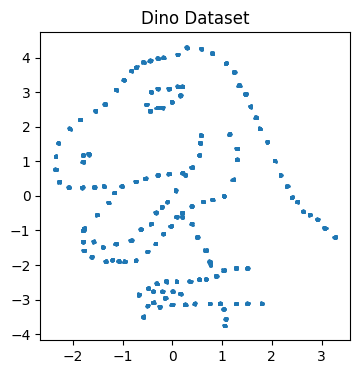

In [3]:
dataset = dino_dataset()

#plot dataset
plt.figure(figsize=(4, 4))
plt.scatter(dataset.tensors[0][:, 0], dataset.tensors[0][:, 1], s=1)
plt.title("Dino Dataset")
plt.show()

In [4]:
print("Dataset shape:", dataset.tensors[0].shape)

Dataset shape: torch.Size([8000, 2])


In [5]:
ddpm = DDPM(dataset, 200)
ddpm.train(150, 1e-3)

Epoch 149: 100%|██████████| 250/250 [00:00<00:00, 270.52it/s, loss=0.755, step=37499]


100%|██████████| 200/200 [00:00<00:00, 574.24it/s]


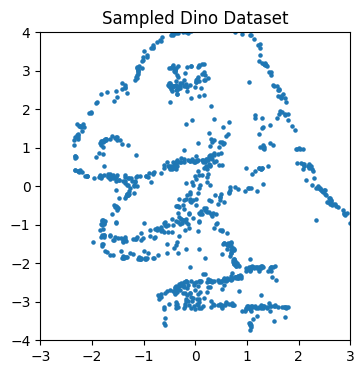

In [6]:
sample = ddpm.sample(1000)
sample = sample.cpu().numpy()
plt.figure(figsize=(4, 4))
plt.scatter(sample[:, 0], sample[:, 1], s=5)
plt.xlim(-3, 3)
plt.ylim(-4, 4)
plt.title("Sampled Dino Dataset")
plt.show()